In [1]:
# import various modules
import metadatabase as mdb
from data import Data
from data_prep import DataPrep
import matplotlib.pyplot as plt
import numpy as np
from preprocess import Preprocess

### Practicing loading + handling metadata

(Only use when on Niagara, or when raw data is available)

In [8]:
data_path='/home/s/sievers/lauriea/prizm-analysis/selections/'
data_file='2021_100MHz_EW_Partial.p'
database = Data.via_metadatabase(selection=data_path+data_file)

In [9]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [10]:
print(mdb._directories['metadata'])

/home/s/sievers/lauriea/prizm-analysis


In [11]:
database.partition(instruments=['100MHz'], channels=['EW'],buffer=(1,1))

In [12]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [13]:
database.lst(instruments=['100MHz'],channels=['EW'])

In [14]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [15]:
testdata = np.array(database.get(data='pol',instrument='100MHz',channel='EW',partition='antenna'))

In [16]:
print(testdata.shape)
# (number of spectra, number of frequency channels)

(165328, 4096)


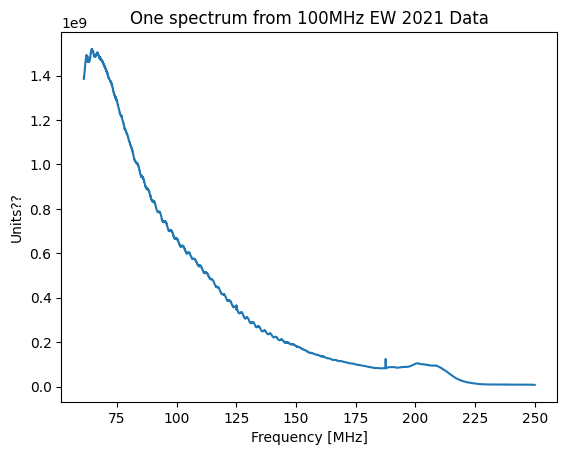

In [17]:
freqarray=np.linspace(0,250,len(testdata[0]))
# plt.plot(freqarray,testdata[0])
plt.plot(freqarray[1000:],testdata[3000,1000:])
# plt.imshow(testdata)
plt.title('One spectrum from 100MHz EW 2021 Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Units??')
plt.show()
# print(len(testdata))

In [ ]:
# Trying to use DataPrep
datapreptest = DataPrep(instrument='100MHz',channel='EW',year='2021')

In [53]:
caldata = datapreptest('GSM')

In [58]:
datamaybe = caldata[0]
print(datamaybe.shape)
lstmaybe = caldata[1]
print(lstmaybe.shape)

(165328, 4096)
(165328,)


### Testing analysis functions using test data downloaded from Niagara

In [2]:
# Data location
test_data_directory = '/home/lauriea/prizm/test_data/'
year = '2021'
instrument = '100'
channel = 'EW'

# test_data_path = test_data_directory + 'data' + '_' + year + '_' +
file_ending = '_' + year + '_' + instrument + channel + '.npy'

In [3]:
with open(test_data_directory + 'data' + file_ending, 'rb') as f:
    testdata = np.load(f)

In [4]:
print(testdata)

[[1.46750672e+11 2.47341228e+10 2.78847466e+08 ... 8.04723800e+06
  7.97381400e+06 7.73301200e+06]
 [1.49687317e+11 2.47532999e+10 2.79027434e+08 ... 8.02330600e+06
  7.99436600e+06 7.73434600e+06]
 [1.54156166e+11 2.47442212e+10 2.78885766e+08 ... 8.03373000e+06
  7.98416200e+06 7.73604600e+06]
 ...
 [1.49406462e+11 2.69378937e+10 2.53497296e+08 ... 7.98699400e+06
  7.98581400e+06 7.70532400e+06]
 [1.47830473e+11 2.69419964e+10 2.53849978e+08 ... 7.98077800e+06
  7.96805800e+06 7.71375400e+06]
 [1.53444785e+11 2.69468444e+10 2.53678626e+08 ... 8.00375200e+06
  7.97064000e+06 7.69163200e+06]]


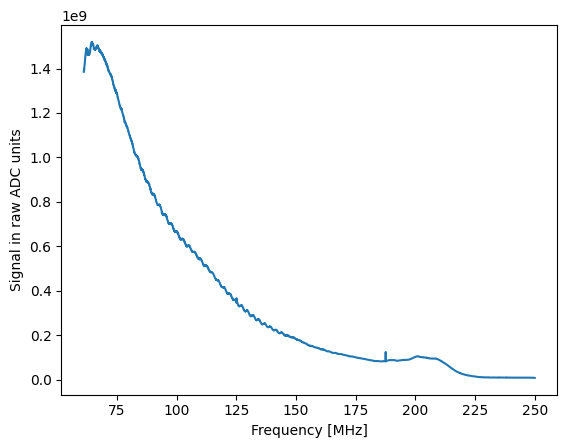

In [9]:
freqarray=np.linspace(0,250,len(testdata[0])) # from PRIZM instrument paper
plt.plot(freqarray[1000:],testdata[3000,1000:])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Signal in raw ADC units')
plt.show()

In [3]:
# Using preprocess.py
preprocess = Preprocess(file_ending, test_data_directory)
data, lst, systime, day_splits = preprocess()

In [5]:
import preprocess as pp

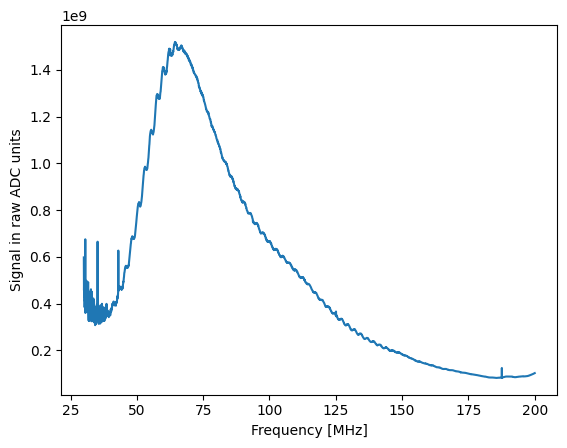

In [6]:
# freqarray=np.linspace(0,250,len(data[0])) # from PRIZM instrument paper
freqarray=pp.xrange()
plt.plot(freqarray,data[3000])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Signal in raw ADC units')
plt.show()

(165328, 2785)
[5.04370606e+08 3.60109868e+08 4.38271090e+08 ... 1.01272952e+08
 1.01539156e+08 1.02191860e+08]


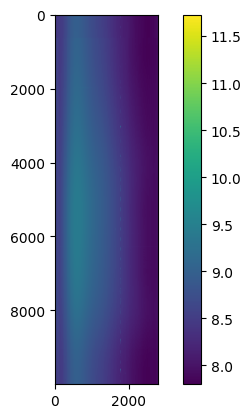

In [9]:
print(np.shape(data))
print(data[0])
plt.imshow(np.log10(data[5000:15000]))
plt.colorbar()
plt.show()

# 1. Sky Calibration Factors

In [1]:
import numpy as np
import statistics as stat
import scipy
from matplotlib import pyplot as plt
import PrizmCalibration as cl # this module is missing dependencies
from gsm_data import GSMData, get_desired_frequencies
from data_prep import DataPrep
from data_binning import *

In [2]:
# The data and calibration type I want to do
year = '2021'
instrument = '100MHz'
channel = 'EW'
calibration_type = 'GSM'

### 1.1. Preparing the data

Note: need to be on Niagara to retrieve data from Jon's project folder, as of now

In [1]:
# Step 1: use DataPrep to automatically retrieve data from the metadatabase, partition it,
# and convert UNIX times to LST
dataprep = DataPrep(instrument, channel, year)
data, lst, _ = dataprep(calibration_type=calibration_type) # this gets P_antenna - P_Short = P_Sky * eta

NameError: name 'DataPrep' is not defined

In [ ]:
# Optional: save output of dataprep to avoid having to retrieve the data again
path2file = '../test_data/'
file_end = '_2021_100EW.npy'
arrays = [data, lst]
names = ['data', 'lst']

for i in range(len(names)):
    np.save(path2file + names[i] + file_end, arrays[i])

In [3]:
# Optional: if you need to load in data that you've already saved
path2file = '/home/lauriea/prizm/test_data/'
file_end = '_2021_100EW.npy'

with open(path2file + 'data' + file_end, 'rb') as f:
    data = np.load(f)
with open(path2file + 'lst' + file_end, 'rb') as f:
    lst = np.load(f)

In [4]:
# Step 2-3: Data truncation to 30-200 MHz (from PRIZM paper), and RFI flagging
RFI = RFI_flagging(data, lst)
# data = RFI()
# For now I'm getting crashes, so I skip over it and I'll try again on Jupyter on Niagara

In [ ]:
# Optional: LST binning


In [ ]:
# Optional: Frequency binning
# Doing 2 MHz for now because that's the default gsm code setting

### 1.2. Analysis: Sky Cal Factors

In [4]:
# Step 0: Load in the GSM model temperatures, this can take a while to load
minperbin = 2 # here you have to specify an LST bin width

g = GSMData(instrument, channel, minperbin)

In [4]:
# Step 1: Convolve the GSM model with the antenna beam. This gives the expected temperature T_GSM. 
# Is done automatically by GSMData when called.
# Retrieves simulated GSM temps, takes a while to run so it's in its own cell
Tgsm = g()

dict_keys(['theta', 'phi', 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0, 140.0, 142.0, 144.0, 146.0, 148.0, 150.0, 152.0, 154.0, 156.0, 158.0, 160.0, 162.0, 164.0, 166.0, 168.0, 170.0, 172.0, 174.0, 176.0, 178.0, 180.0, 182.0, 184.0, 186.0, 188.0, 190.0, 192.0, 194.0, 196.0, 198.0, 200.0, 'normalization'])
(37.81963888888889, -46.886944444444445)


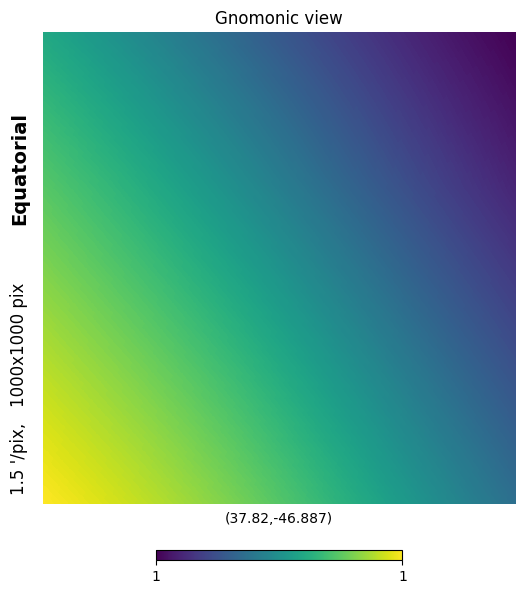

In [10]:
# Not necessary step -- just trying to visualize the healpy beam
import healpy as hp

def dms_to_ddd(degree,arcmin,arcsec,direction):
    '''
    Function converts from degree,arcmin,arcsec to decimal degree coordinates.

    Parameters
    -----------
    direction: cardinal direction that your dms is in, one of: 'N', 'S', 'E', 'W'.
    '''

    if direction == 'S' or direction == 'W':
        sign = -1
    elif direction == 'N' or direction == 'E':
        sign = +1
    else:
        print('Invalid cardinal direction given.')
        # change this to raiseWarning eventually

    arcmin_per_degree = 60
    arcsec_per_degree = 3600
    degree_decimal = sign*(degree+arcmin/arcmin_per_degree+arcsec/arcsec_per_degree)

    return degree_decimal

print(g.healpy_beam.keys())
site_coords = (dms_to_ddd(37,49,10.7,'E'),dms_to_ddd(46,53,13,'S')) # in degrees
print(site_coords)
hp.visufunc.gnomview(10**(g.healpy_beam[100.0]/10),coord='C',rot=site_coords,xsize=1000)

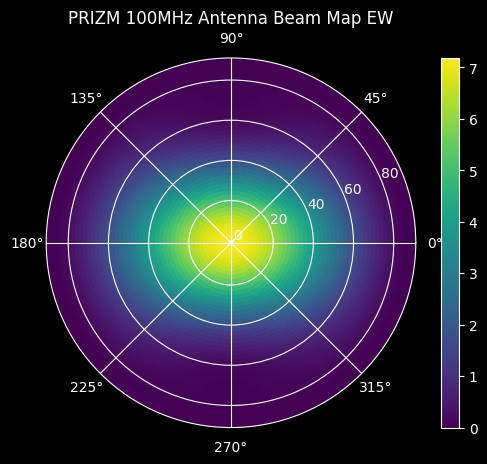

In [6]:
plt.style.use('dark_background') # 'default' for regular style
# print(plt.style.available)
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
bm = ax.pcolormesh(g.beam_dict['phi'],g.beam_dict['theta']*180/np.pi,10**(g.beam_dict[40].T/10))
fig.colorbar(bm,ax=ax)
plt.title('PRIZM 100MHz Antenna Beam Map EW')
plt.show()

(86,)
86.0
(720,)
720.0


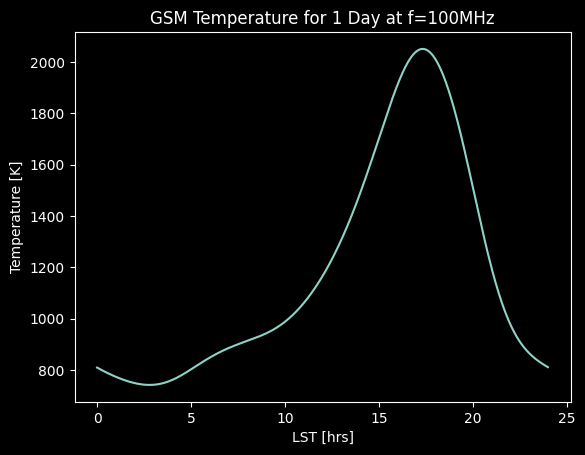

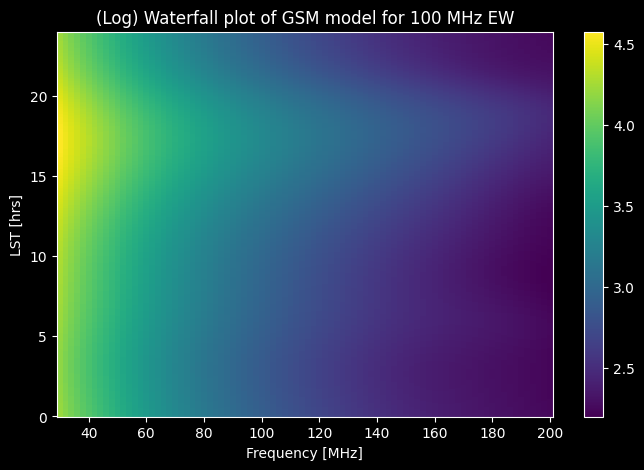

In [34]:
print(Tgsm[0].shape)
print((202-30)/2) # corresponds to number of frequency bins, 30-200 MHz in 2MHz bins

print(Tgsm[:,0].shape)
print(1440/2) # corresponds to number of LST bins, 24 hrs = 1440 mins in 2 min bins

# Plot Tgsm as a function of LST for a certain frequency
# freqind = 85 # freq index
# freqval = freqind*2+30 # actually freq value in MHz
# print('freq=',freqval)

# Inverse process (specify f then turn it into index)
freqval = 100 # MHz
freqind = int((freqval-30) / minperbin)

lst_arr = np.linspace(0,24,int(24*60/minperbin))
plt.plot(lst_arr,Tgsm[:,freqind]) # i = specifies time, j = specifies frequency
plt.xlabel('LST [hrs]')
plt.ylabel('Temperature [K]')
plt.title('GSM Temperature for 1 Day at f='+str(freqval)+'MHz')
plt.show()

# Waterfall plot
plt.figure(figsize=(8,5))
freq_arr = np.arange(30,202,2)
FF, LST = np.meshgrid(freq_arr,lst_arr)
# plt.imshow(Tgsm,aspect='equal')
plt.pcolormesh(FF,LST,np.log10(Tgsm))
plt.colorbar()
plt.xlabel('Frequency [MHz]')
plt.ylabel('LST [hrs]')
plt.title('(Log) Waterfall plot of GSM model for 100 MHz EW')
plt.show()

In [40]:
# Step 2: Compute/find P_sky*eta from the data. P_sky is the antenna power coming from just the sky.
# P_Sky = P_antenna - P_short / eta
# This was already done in an above cell, ie 'data' == P_Sky * eta

In [6]:
# Step 3: Compute the transmission efficiency η (eta) from the data.
# Status: Work in progress -- not yet functional on 2021 files

# Example files, in practice we will want to interpolate or choose the VNA files taken closest to the measurement
# antenna_s11_file_path = '/project/s/sievers/prizm/prizm_vna_2021/100/2021-08-13-PRIZM-100-EW.txt'
# frontend_s11_file_path = '/project/s/sievers/prizm/prizm_vna_2021/100-LNA/2022-01-09-PRIZM-100-EW-LNA.txt'

antenna_s11_file_path = '/home/lauriea/prizm/test_data/2021-08-13-PRIZM-100-EW.txt'
frontend_s11_file_path = '/home/lauriea/prizm/test_data/2022-01-09-PRIZM-100-EW-LNA.txt'

cl.find_efficiency2(antenna_s11_file_path,frontend_s11_file_path,xsmooth=200) # !! Need to figure out proper xsmooth

Exception: A new case of VNA data formatting!

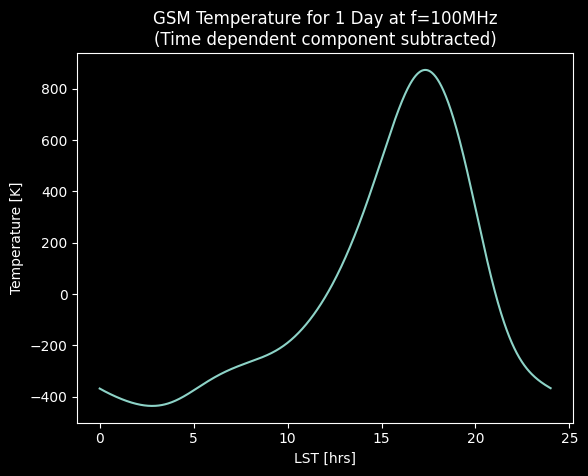

In [40]:
# Step 4: Take a full sidereal day average of the T_GSM and subtract the time-independent 
# component from T_GSM. Do the same for T_sky = K_dGSM * P_Sky (the data).
# (For now we skip computing eta, the transmission efficiency (eta), and absorb it into K as a first pass)

# 4.1. GSM temperature
Tgsm_dayavg = np.mean(Tgsm,axis=0)
# print(Tgsm_dayavg.shape) # used to check the averaging was along the right axis
dTgsm = Tgsm - Tgsm_dayavg # daily mean (time independent component) removed from Tgsm

plt.plot(lst_arr,dTgsm[:,freqind]) # i = specifies time, j = specifies frequency
plt.xlabel('LST [hrs]')
plt.ylabel('Temperature [K]')
plt.title('GSM Temperature for 1 Day at f='+str(freqval)+'MHz\n(Time dependent component subtracted)')
plt.show()

In [9]:
# 4.2. Data 
# RFI.truncate(highpass=30,lowpass=200)
# data = RFI.data
# Psky_dayavg = np.mean()
# dPsky = 

# Waterfall plot
plt.figure(figsize=(8,5))
freq_arr_full = RFI.freq
FFdata, LSTdata = np.meshgrid(freq_arr_full,lst[0:1000])
# plt.imshow(Tgsm,aspect='equal')
plt.pcolormesh(FFdata,LSTdata,np.log10(data[0:1000]))
plt.colorbar()
plt.xlabel('Frequency [MHz]')
plt.ylabel('LST [hrs]')
plt.title('(Log) Limited LST waterfall plot of GSM real data for 100 MHz EW\n(RFI NOT removed, \
    freq range NOT truncated)')
plt.show()

/tmp/ipykernel_61731/1958053209.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(FFdata,LSTdata,np.log10(data[0:5000]))


: 